In [1]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [70]:
# Load data
df = pd.read_csv('C:/Users/249881/Desktop/unilever/data/new_data.csv')
df.shape

#Convert Period to Datetime-object
df['Period'] = pd.to_datetime(df['Period'], dayfirst=True)

In [71]:
df.isnull().sum().to_clipboard()

In [72]:
# Ignoring columns with higher number of missing values
df_sub = df[['Period', 'Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon', 'InvescoTAN_Price', 'ICLN_Price', 'CCFI', 'CSCFI', 'BDI', 'China_Production_000_MT', 'China_Demand_Total_000_MT', 'US_Production_000_MT', 'US_Demand_Total_000_MT', 'US_Export_000_MT', 'EU_Production_000_MT', 'EU_Demand_Total_000_MT', 'EU_Export_000_MT', 'Coke', 'NaturalGasIndex', 'CoalIndex', 'shanghai_pm25', 'shanghai_pm10', 'beijing_pm25', 'beijing_pm10', 'BRA_CPI', 'CHN_CPI', 'DEU_CPI', 'FRA_CPI', 'GBR_CPI', 'IND_CPI', 'JPN_CPI', 'KOR_CPI', 'MEX_CPI', 'USA_CPI', 'US_SI', 'China_SI', 'UK_SI', 'Germany_SI', 'India_SI', 'Brazil_SI', 'Indonesia_SI', 'SouthKorea_SI', 'Japan_SI', 'Mexico_SI']]

In [73]:
# df_sub.isnull().sum()
df_sub.shape
df_sub = df_sub.dropna()
df_sub.shape

(123, 42)

In [74]:
df_price = df_sub[['Period', 'Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon']]
# df_price = df_price.dropna()
print(df_price['Period'].min())
print(df_price['Period'].max())
print(len(df_price['Period']))

2014-01-01 00:00:00
2024-03-01 00:00:00
123


### Watch the trend of price

In [17]:
# Import necessary modules
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Initialize notebook mode for Plotly
init_notebook_mode(connected=True)

# Plotting the data: price vs period
fig = go.Figure(data=[go.Scatter(x=df_price['Period'], y=df_price['Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon'])])

# Plot the figure 
iplot(fig)

c:\Users\249881\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [19]:
# load isolation forest module
from sklearn.ensemble import IsolationForest

# Creating an Isolation Forest model
clf=IsolationForest(n_estimators=10, max_samples='auto', contamination=float(.05), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
# Fitting the mode
clf.fit(df_price[['Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon']])
# Calculating anomaly scores - decision function calculates the anomaly scores for each data point, and these scores
#  are added as a new column 'scores' in df_price.
df_price['scores']=clf.decision_function(df_price[['Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon']])
# Predicting anomalies - model predicts whether each data point is an anomaly or not. The results are added as a new 
# column 'anomaly' in df_price. The values in this column will be 1 for normal data points and -1 for anomalies.
df_price['anomaly']=clf.predict(df_price[['Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon']])
df_price.head()

c:\Users\249881\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

C:\Users\249881\AppData\Local\Temp\ipykernel_14004\4122732528.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\249881\AppData\Local\Temp\ipykernel_14004\4122732528.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Period,Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon,scores,anomaly
12,2014-01-01,227.50,0.224429,1
13,2014-02-01,223.75,0.239427,1
14,2014-03-01,218.75,0.232290,1
15,2014-04-01,221.25,0.241164,1
16,2014-05-01,230.00,0.214687,1


In [22]:
df_price['anomaly'].value_counts()
df_price[df_price['anomaly'] == -1]        # Anomalies

,Period,Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon,scores,anomaly
88,2020-05-01,168.75,-0.025091,-1
89,2020-06-01,158.75,-0.086359,-1
90,2020-07-01,162.50,-0.030340,-1
91,2020-08-01,170.00,-0.035631,-1
105,2021-10-01,507.50,-0.058354,-1
106,2021-11-01,510.00,-0.069424,-1
107,2021-12-01,420.00,-0.000501,-1


### Visualize

In [33]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot

def plot_anomaly(df, metric_name):
    # Convert 'Period' to datetime
    df['timestamp'] = pd.to_datetime(df['Period'], format="%Y-%m-%d")
    dates = df['timestamp']
    
    # Identify anomaly points
    bool_array = df['anomaly'] < 0  # anomalies where anomaly is -1
    actuals = df["Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon"]
    
    # Color map for conditional formatting in the table
    colors = ['rgba(228, 222, 249, 0.65)' if x == 1 else 'red' for x in df['anomaly']]

    # Table which includes Date, Actuals
    table = go.Table(
        domain=dict(x=[0, 1], y=[0, 0.3]),
        columnwidth=[1, 2],
        header=dict(
            height=20,
            values=[['<b>Date</b>'], ['<b>Actual Values</b>']],
            font=dict(color='rgb(45, 45, 45)', size=14),
            fill_color='#d562be'
        ),
        cells=dict(
            values=[dates.dt.strftime('%Y-%m-%d'), actuals.round(3)],
            line=dict(color='#506784'),
            align=['center'],
            font=dict(color='rgb(40, 40, 40)', size=12),
            height=27,
            fill_color=colors  # Ensure that the list of colors is correctly passed here
        )
    )
    
    # Plot the actual points
    Actuals = go.Scatter(
        name='Actuals',
        x=dates,
        y=actuals,
        mode='lines+markers',
        line=dict(color="blue")
    )
    
    # Highlight the anomaly points
    anomalies_map = go.Scatter(
        name="Anomaly",
        x=dates[bool_array],
        y=actuals[bool_array],
        mode='markers',
        marker=dict(color="red", size=11, line=dict(color="red", width=2))
    )
    
    # Axis and layout settings
    layout = go.Layout(
        width=1000,
        height=865,
        autosize=False,
        title=metric_name,
        margin=dict(t=75),
        showlegend=True,
        xaxis=dict(showline=True, zeroline=False, showgrid=True, mirror=True, ticklen=4, gridcolor='#ffffff', tickfont=dict(size=10), domain=[0, 1]),
        yaxis=dict(showline=True, zeroline=False, showgrid=True, mirror=True, ticklen=4, gridcolor='#ffffff', tickfont=dict(size=10), domain=[0.4, 1], hoverformat='.2f')
    )
    
    fig = go.Figure(data=[table, Actuals, anomalies_map], layout=layout)
    iplot(fig)

# Example usage
# Make sure df_price is defined and has the appropriate columns and data.
plot_anomaly(df_price, 'Anomaly Detection for Soda Ash Prices')


C:\Users\249881\AppData\Local\Temp\ipykernel_14004\3998671685.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\249881\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Modular code

### Function for anomaly detection

In [92]:
from sklearn.ensemble import IsolationForest

def detect_anomalies(df, target_column, n_estimators=10, max_samples='auto', contamination=0.05, bootstrap=False, random_state=42, verbose=0):
    # Create an Isolation Forest model
    clf = IsolationForest(n_estimators=n_estimators, max_samples=max_samples,
                          contamination=contamination, bootstrap=bootstrap,
                          n_jobs=-1, random_state=random_state, verbose=verbose)
    
    # Fit the model
    clf.fit(df[[target_column]])
    
    # Calculate anomaly scores
    df['scores'] = clf.decision_function(df[[target_column]])
    
    # Predict anomalies
    df['anomaly'] = clf.predict(df[[target_column]])
    
    return df


### Plotting Function

In [96]:
# dates = df['timestamp']
# actuals = df[data_col]
# anomalies = df[anomaly_col] < 0  # Assuming -1 indicates an anomaly

# dates_a = df.loc[df[anomaly_col] < 0, 'timestamp']
# actuals_a = df.loc[df[anomaly_col] < 0, data_col]

# # Color map for conditional formatting in the table
# colors = ['rgba(228, 222, 249, 0.65)' if x == 1 else 'red' for x in df[anomaly_col]]

# # Table including Date and Actual Values
# table = go.Table(
#     domain=dict(x=[0, 1], y=[0, 0.3]),
#     columnwidth=[1, 2],
#     header=dict(
#         values=['<b>Date</b>', '<b>Actual Values</b>'],
#         font=dict(size=14),
#         fill_color='#d562be'),
#     cells=dict(
#         values=[dates_a.dt.strftime('%Y-%m-%d'), actuals_a.round(3)],
#         align='center',
#         font_size=12,
#         fill_color=colors
#     )
# )

In [94]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

def plot_anomalies(df, date_col, data_col, anomaly_col, title):
    # Convert 'date_col' to datetime if not already
    df['timestamp'] = pd.to_datetime(df[date_col], format="%Y-%m-%d")
    
    # Extract data for plotting
    dates = df['timestamp']
    actuals = df[data_col]
    anomalies = df[anomaly_col] < 0  # Assuming -1 indicates an anomaly

    dates_a = df.loc[df[anomaly_col] < 0, 'timestamp']
    actuals_a = df.loc[df[anomaly_col] < 0, data_col]

    # Color map for conditional formatting in the table
    colors = ['rgba(228, 222, 249, 0.65)' if x == 1 else 'red' for x in df[anomaly_col]]
    
    # Table including Date and Actual Values
    table = go.Table(
        domain=dict(x=[0, 1], y=[0, 0.3]),
        columnwidth=[1, 2],
        header=dict(
            values=['<b>Date</b>', '<b>Anomaly Values</b>'],
            font=dict(size=14),
            fill_color='#d562be'),
        cells=dict(
            values=[dates_a.dt.strftime('%Y-%m-%d'), actuals_a.round(3)],
            align='center',
            font_size=12,
            fill_color=colors
        )
    )
    
    # Actual data points plot
    actuals_plot = go.Scatter(
        name='Actuals',
        x=dates,
        y=actuals,
        mode='lines+markers',
        line=dict(color="blue")
    )
    
    # Highlight anomaly points
    anomalies_plot = go.Scatter(
        name="Anomalies",
        x=dates[anomalies],
        y=actuals[anomalies],
        mode='markers',
        marker=dict(color="red", size=11)
    )
    
    # Layout configuration
    layout = go.Layout(
        title=title,
        showlegend=True,
        xaxis=dict(domain=[0, 1]),
        yaxis=dict(domain=[0.4, 1]),
        height=600
    )
    
    fig = go.Figure(data=[table, actuals_plot, anomalies_plot], layout=layout)
    iplot(fig)


In [95]:
df_plot = detect_anomalies(df_sub, 'Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon')

plot_anomalies(df_sub, 'Period', 'Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon', 'anomaly', 'Anomaly Detection for Soda Ash Prices')


c:\Users\249881\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

c:\Users\249881\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Different Indexes

In [68]:
# df_sub

# 1. Composite cpi
# 2. Energy Index
# 3. Shipping Index
# 4. Look into capacity
# 5. Segment wise analysis (for differenr regions, different features matters)
# 6. China supply-demand balance (Create a feature that represents the difference or
#  ratio between China_Demand_Total_000_MT and China_Production_000_MT.)
# 7. Relative CPI: Create features that represent the relative CPI of China 
# compared to other countries, especially those with strong correlations.
# 8. . Interaction terms: Create interaction features between 
# top correlated variables, such as CoalIndex * Coke or USA_CPI * CoalIndex
# 9. Anomaly indicators: Create binary features that indicate when any of 
# the top correlated features deviate significantly from their historical norms.

In [77]:
df_sub.columns
# cpi_columns = ['GBR_CPI', 'FRA_CPI', 'USA_CPI', 'DEU_CPI', 'KOR_CPI', 'MEX_CPI']
cpi_columns = ['BRA_CPI', 'CHN_CPI','DEU_CPI', 'FRA_CPI', 'GBR_CPI', 'IND_CPI', 'JPN_CPI', 'KOR_CPI','MEX_CPI', 'USA_CPI',]
df_sub[cpi_columns]

,BRA_CPI,CHN_CPI,DEU_CPI,FRA_CPI,GBR_CPI,IND_CPI,JPN_CPI,KOR_CPI,MEX_CPI,USA_CPI
12,5.59,2.5,1.1,0.8,1.9,7.24,1.4,1.08,4.48,1.58
13,5.68,2.0,1.0,1.1,1.7,6.73,1.5,1.01,4.23,1.13
14,6.15,2.4,0.7,0.8,1.6,6.70,1.6,1.29,3.76,1.51
15,6.28,1.8,1.1,0.8,1.8,7.08,3.4,1.50,3.50,1.95
16,6.37,2.5,0.7,0.8,1.5,7.02,3.7,1.67,3.51,2.13
...,...,...,...,...,...,...,...,...,...,...
130,4.51,-0.8,3.1,3.4,4.0,4.59,-0.5,2.80,4.88,3.09
131,4.50,0.7,2.7,3.2,3.4,4.59,-0.5,3.12,4.40,3.15
132,3.93,0.1,2.3,2.4,3.2,4.59,-0.5,3.09,4.42,3.48
133,3.69,0.3,2.4,2.4,2.3,4.59,-0.5,2.91,4.65,3.36


In [99]:
# Composite cpi

cpi_columns = ['JPN_CPI', 'FRA_CPI', 'USA_CPI', 'BRA_CPI', 'GBR_CPI', 'MEX_CPI','CHN_CPI']
# Step 1: Normalize the CPI series
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

normalized_cpi = df_sub[cpi_columns].apply(normalize)
normalized_cpi

weights = np.ones(len(cpi_columns)) / len(cpi_columns)
weights

composite_cpi = normalized_cpi.dot(weights)
composite_cpi

min_cpi = df_sub[cpi_columns].min().min()
max_cpi = df_sub[cpi_columns].max().max()
min_cpi
max_cpi

composite_cpi_rescaled = composite_cpi * (max_cpi - min_cpi) + min_cpi

# Add the new features to your DataFrame
df_sub['CPI_Composite'] = composite_cpi
df_sub['CPI_Composite_Rescaled'] = composite_cpi_rescaled




In [100]:
df_plot = detect_anomalies(df_sub, 'CPI_Composite')

plot_anomalies(df_sub, 'Period', 'CPI_Composite', 'anomaly', 'Anomaly Detection for CPI_Composite')


c:\Users\249881\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

c:\Users\249881\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



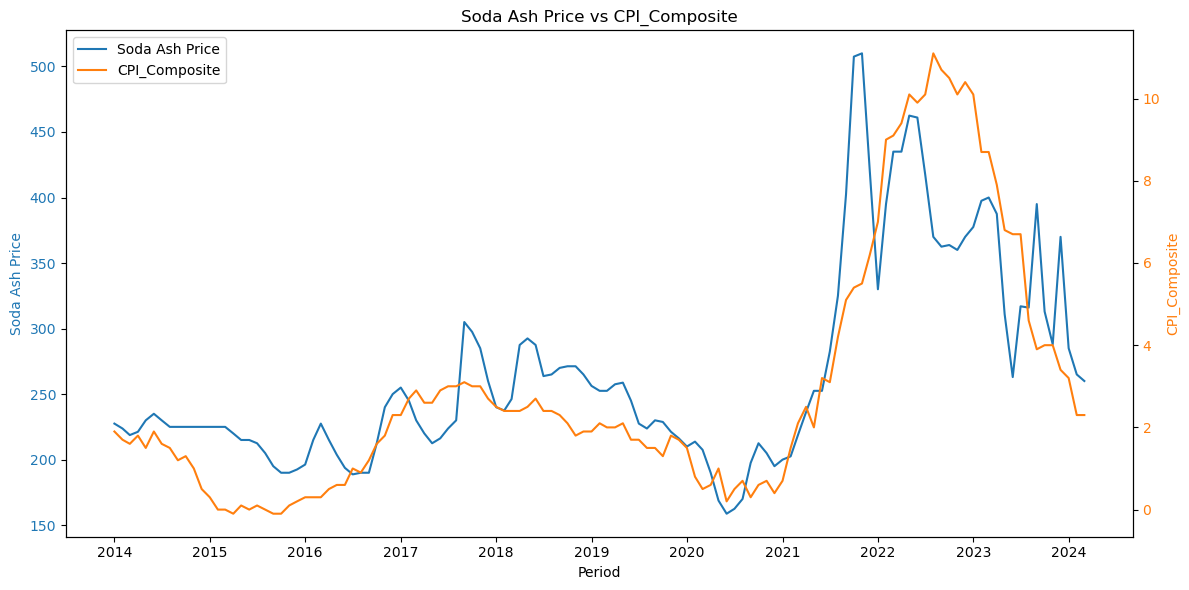

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming your data is in a DataFrame called 'df' with columns 'Date', 'SodaAshPrice', and 'EnergyIndex'
# If it's not, you'll need to load your data into a DataFrame first

# Convert the 'Date' column to datetime if it's not already
df_sub['Period'] = pd.to_datetime(df_sub['Period'])

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Soda Ash Price on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Period')
ax1.set_ylabel('Soda Ash Price', color=color)
ax1.plot(df_sub['Period'], df_sub['Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon'], color=color, label='Soda Ash Price')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis and plot Energy Index
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('CPI_Composite', color=color)
ax2.plot(df_sub['Period'], df_sub['CPI_Composite'], color=color, label='CPI_Composite')
ax2.tick_params(axis='y', labelcolor=color)

# Set the title
plt.title('Soda Ash Price vs CPI_Composite')

# Format the x-axis to show dates nicely
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

In [103]:
# Energy Index
def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

# Normalize the components
df_sub['CoalIndex_norm'] = normalize(df_sub['CoalIndex'])
df_sub['Coke_norm'] = normalize(df_sub['Coke'])
df_sub['NaturalGasIndex_norm'] = normalize(df_sub['NaturalGasIndex'])

# Calculate the energy index
df_sub['EnergyIndex'] = (
    df_sub['CoalIndex_norm'] * 1/3 +
    df_sub['Coke_norm'] * 1/3 +
    df_sub['NaturalGasIndex_norm'] * 1/3
)

In [118]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# # plt.plot(df_sub['Period'], df_sub['Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon'], label='Soda Ash Price')
# plt.plot(df_sub['Period'], df_sub['EnergyIndex'], label='Energy Index')
# plt.legend()
# plt.title('Soda Ash Price vs Energy Index')
# plt.xlabel('Date')
# plt.ylabel('Normalized Value')
# plt.show()

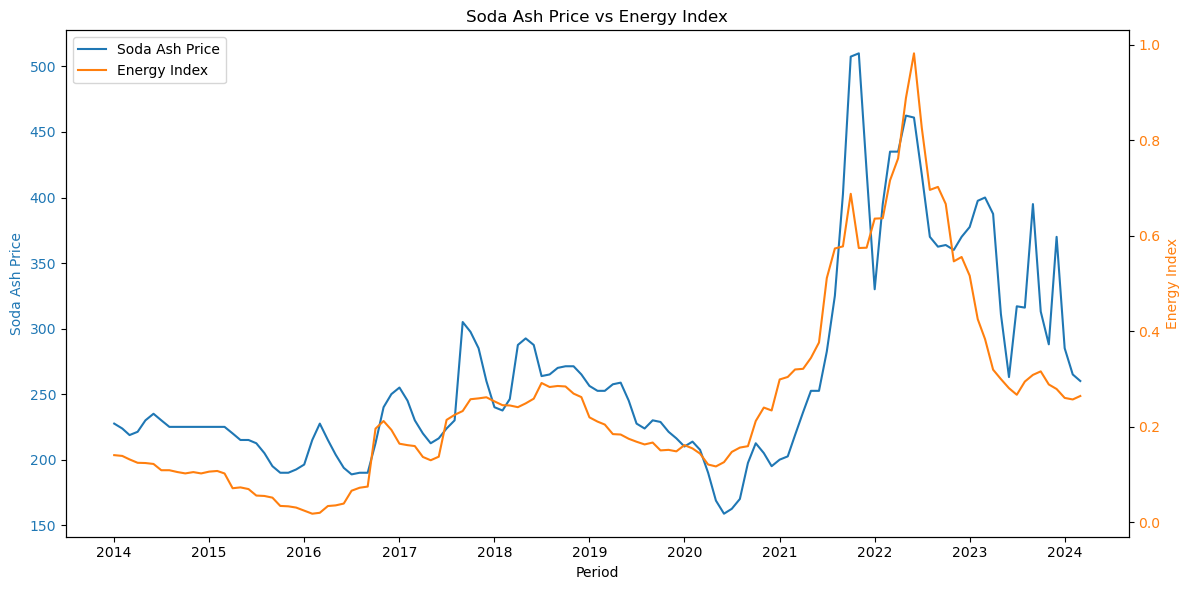

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming your data is in a DataFrame called 'df' with columns 'Date', 'SodaAshPrice', and 'EnergyIndex'
# If it's not, you'll need to load your data into a DataFrame first

# Convert the 'Date' column to datetime if it's not already
df_sub['Period'] = pd.to_datetime(df_sub['Period'])

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Soda Ash Price on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Period')
ax1.set_ylabel('Soda Ash Price', color=color)
ax1.plot(df_sub['Period'], df_sub['Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon'], color=color, label='Soda Ash Price')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis and plot Energy Index
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Energy Index', color=color)
ax2.plot(df_sub['Period'], df_sub['EnergyIndex'], color=color, label='Energy Index')
ax2.tick_params(axis='y', labelcolor=color)

# Set the title
plt.title('Soda Ash Price vs Energy Index')

# Format the x-axis to show dates nicely
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

In [119]:
df_plot = detect_anomalies(df_sub, 'EnergyIndex')

plot_anomalies(df_sub, 'Period', 'EnergyIndex', 'anomaly', 'Anomaly Detection for EnergyIndex')

c:\Users\249881\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

c:\Users\249881\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# 8. China supply-demand balance (Create a feature that represents the difference or
#  ratio between China_Demand_Total_000_MT and China_Production_000_MT.)

In [128]:
df_sub.columns

Index(['Period',
       'Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon',
       'InvescoTAN_Price', 'ICLN_Price', 'CCFI', 'CSCFI', 'BDI',
       'China_Production_000_MT', 'China_Demand_Total_000_MT',
       'US_Production_000_MT', 'US_Demand_Total_000_MT', 'US_Export_000_MT',
       'EU_Production_000_MT', 'EU_Demand_Total_000_MT', 'EU_Export_000_MT',
       'Coke', 'NaturalGasIndex', 'CoalIndex', 'shanghai_pm25',
       'shanghai_pm10', 'beijing_pm25', 'beijing_pm10', 'BRA_CPI', 'CHN_CPI',
       'DEU_CPI', 'FRA_CPI', 'GBR_CPI', 'IND_CPI', 'JPN_CPI', 'KOR_CPI',
       'MEX_CPI', 'USA_CPI', 'US_SI', 'China_SI', 'UK_SI', 'Germany_SI',
       'India_SI', 'Brazil_SI', 'Indonesia_SI', 'SouthKorea_SI', 'Japan_SI',
       'Mexico_SI', 'CPI_Composite', 'CPI_Composite_Rescaled', 'scores',
       'anomaly', 'timestamp', 'CoalIndex_norm', 'Coke_norm',
       'NaturalGasIndex_norm', 'EnergyIndex', 'china_s_d'],
      dtype='object')

In [129]:
df_sub['china_s_d'] = df_sub['China_Production_000_MT']/df_sub['China_Demand_Total_000_MT']
df_sub['china_s_d']

12     1.051301
13     1.051301
14     1.051301
15     0.996509
16     0.996509
         ...   
130    1.086649
131    1.086649
132    0.994606
133    0.994606
134    0.994606
Name: china_s_d, Length: 123, dtype: float64

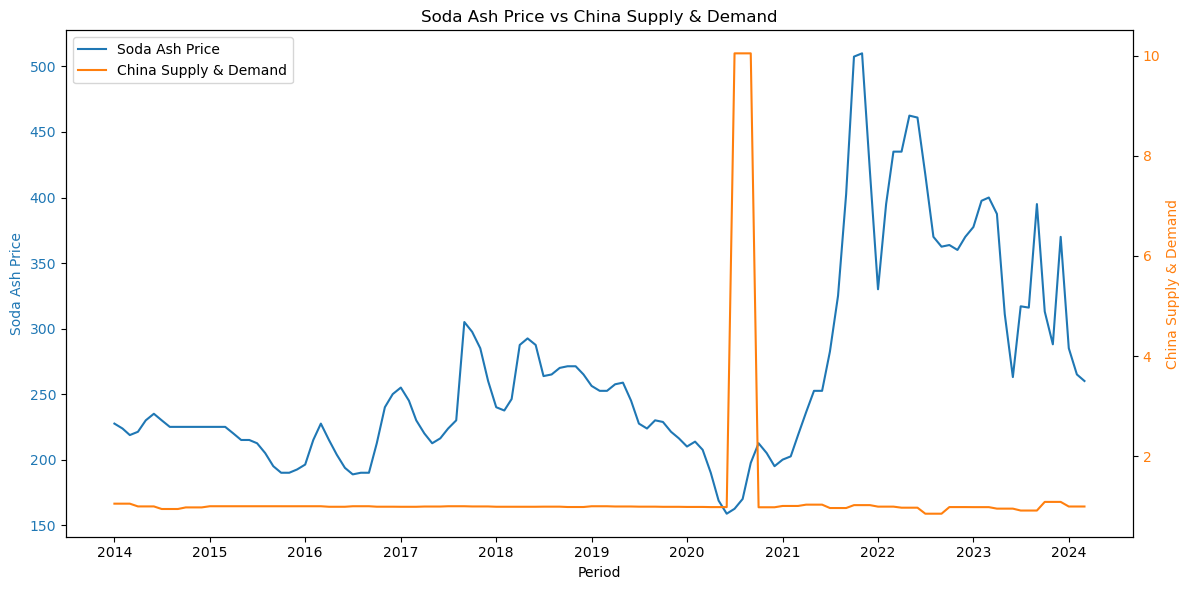

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming your data is in a DataFrame called 'df' with columns 'Date', 'SodaAshPrice', and 'EnergyIndex'
# If it's not, you'll need to load your data into a DataFrame first

# Convert the 'Date' column to datetime if it's not already
df_sub['Period'] = pd.to_datetime(df_sub['Period'])

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Soda Ash Price on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Period')
ax1.set_ylabel('Soda Ash Price', color=color)
ax1.plot(df_sub['Period'], df_sub['Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon'], color=color, label='Soda Ash Price')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis and plot Energy Index
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('China Supply & Demand', color=color)
ax2.plot(df_sub['Period'], df_sub['china_s_d'], color=color, label='China Supply & Demand')
ax2.tick_params(axis='y', labelcolor=color)

# Set the title
plt.title('Soda Ash Price vs China Supply & Demand')

# Format the x-axis to show dates nicely
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

# 7. Relative CPI: Create features that represent the relative CPI of China 
# compared to other countries, especially those with strong correlations.
# 8. . Interaction terms: Create interaction features between 
# top correlated variables, such as CoalIndex * Coke or USA_CPI * CoalIndex

In [136]:
df_sub['interaction_term1'] = df_sub['CoalIndex'] * df_sub['USA_CPI']
df_sub['interaction_term1']

df_sub['interaction_term2'] = df_sub['CoalIndex'] * df_sub['Coke']

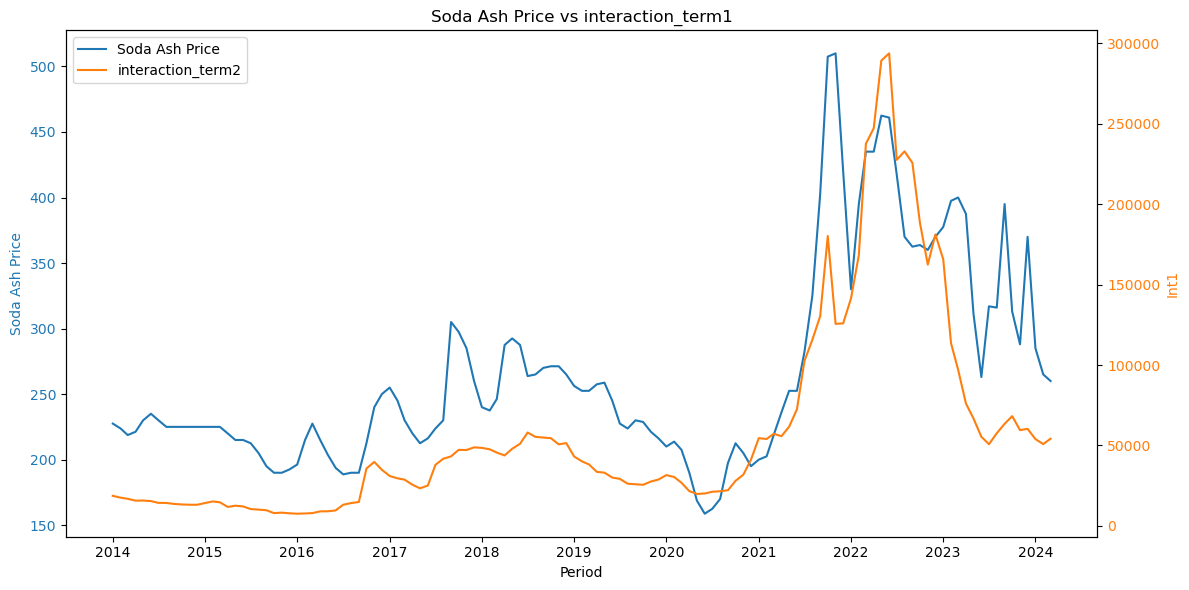

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming your data is in a DataFrame called 'df' with columns 'Date', 'SodaAshPrice', and 'EnergyIndex'
# If it's not, you'll need to load your data into a DataFrame first

# Convert the 'Date' column to datetime if it's not already
df_sub['Period'] = pd.to_datetime(df_sub['Period'])

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Soda Ash Price on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Period')
ax1.set_ylabel('Soda Ash Price', color=color)
ax1.plot(df_sub['Period'], df_sub['Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon'], color=color, label='Soda Ash Price')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis and plot Energy Index
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Int1', color=color)
ax2.plot(df_sub['Period'], df_sub['interaction_term2'], color=color, label='interaction_term2')
ax2.tick_params(axis='y', labelcolor=color)

# Set the title
plt.title('Soda Ash Price vs interaction_term1')

# Format the x-axis to show dates nicely
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

#### For PPT

In [61]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

def plot_anomalies(df, date_col, data_col, threshold=10):
    # Convert 'date_col' to datetime if not already
    df['timestamp'] = pd.to_datetime(df[date_col], format="%Y-%m-%d")
    
    # Calculate day-to-day percentage change in prices
    df['percent_change'] = df[data_col].pct_change() * 100
    
    # Flag significant changes based on the threshold
    df['anomaly'] = (df['percent_change'].abs() > threshold).astype(int)
    
    # Extract data for plotting
    dates = df['timestamp']
    actuals = df[data_col]
    anomalies = df['anomaly'] == 1

    dates_a = df.loc[anomalies, 'timestamp']
    actuals_a = df.loc[anomalies, data_col]

    # Color map for conditional formatting in the table
    colors = ['red' if x else 'rgba(228, 222, 249, 0.65)' for x in anomalies]
    
    # Table including Date and Actual Values
    table = go.Table(
        domain=dict(x=[0, 1], y=[0, 0.3]),
        columnwidth=[1, 2],
        header=dict(
            values=['<b>Date</b>', '<b>Anomaly Values</b>'],
            font=dict(size=14),
            fill_color='#d562be'),
        cells=dict(
            values=[dates_a.dt.strftime('%Y-%m-%d'), actuals_a.round(3)],
            align='center',
            font_size=12,
            fill_color=colors
        )
    )
    
    # Actual data points plot
    actuals_plot = go.Scatter(
        name='Actuals',
        x=dates,
        y=actuals,
        mode='lines+markers',
        line=dict(color="blue")
    )
    
    # Highlight anomaly points
    anomalies_plot = go.Scatter(
        name="Anomalies",
        x=dates_a,
        y=actuals_a,
        mode='markers',
        marker=dict(color="red", size=11)
    )
    
    # Layout configuration
    layout = go.Layout(
        title='Soda Ash Price Anomaly Detection',
        showlegend=True,
        xaxis=dict(domain=[0, 1]),
        yaxis=dict(domain=[0.4, 1]),
        height=600
    )
    
    fig = go.Figure(data=[table, actuals_plot, anomalies_plot], layout=layout)
    iplot(fig)


In [62]:
plot_anomalies(df_sub, 'Period', 'Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon', threshold=10)

c:\Users\249881\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [64]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot

def plot_anomalies_with_pre_alert(df, date_col, data_col, threshold=10, window_size=5):
    # Convert 'date_col' to datetime if not already
    df['timestamp'] = pd.to_datetime(df[date_col], format="%Y-%m-%d")
    
    # Calculate the moving average
    df['moving_avg'] = df[data_col].rolling(window=window_size).mean()

    # Predict next value assuming continuation of current trend
    df['predicted_next_value'] = df['moving_avg'].shift(-1)

    # Calculate expected percent change
    df['expected_change'] = ((df['predicted_next_value'] - df[data_col]) / df[data_col]) * 100

    # Identify where expected change exceeds the threshold
    df['pre_alert'] = (df['expected_change'].abs() > threshold).astype(int)

    # Plotting
    dates = df['timestamp']
    actuals = df[data_col]
    alerts = df['pre_alert'] == 1

    actuals_plot = go.Scatter(
        name='Actuals',
        x=dates,
        y=actuals,
        mode='lines+markers',
        line=dict(color="blue")
    )

    # Highlight pre-alert points
    pre_alerts_plot = go.Scatter(
        name="Pre-Alerts",
        x=dates[alerts],
        y=actuals[alerts],
        mode='markers',
        marker=dict(color="orange", size=11)
    )

    layout = go.Layout(
        title='Soda Ash Price Early Warning System',
        showlegend=True,
        xaxis=dict(domain=[0, 1]),
        yaxis=dict(domain=[0, 1]),
        height=600
    )
    
    fig = go.Figure(data=[actuals_plot, pre_alerts_plot], layout=layout)
    iplot(fig)

# Assuming you have your DataFrame ready
plot_anomalies_with_pre_alert(df, date_col='Period', data_col='Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon', threshold=10, window_size=5)


c:\Users\249881\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



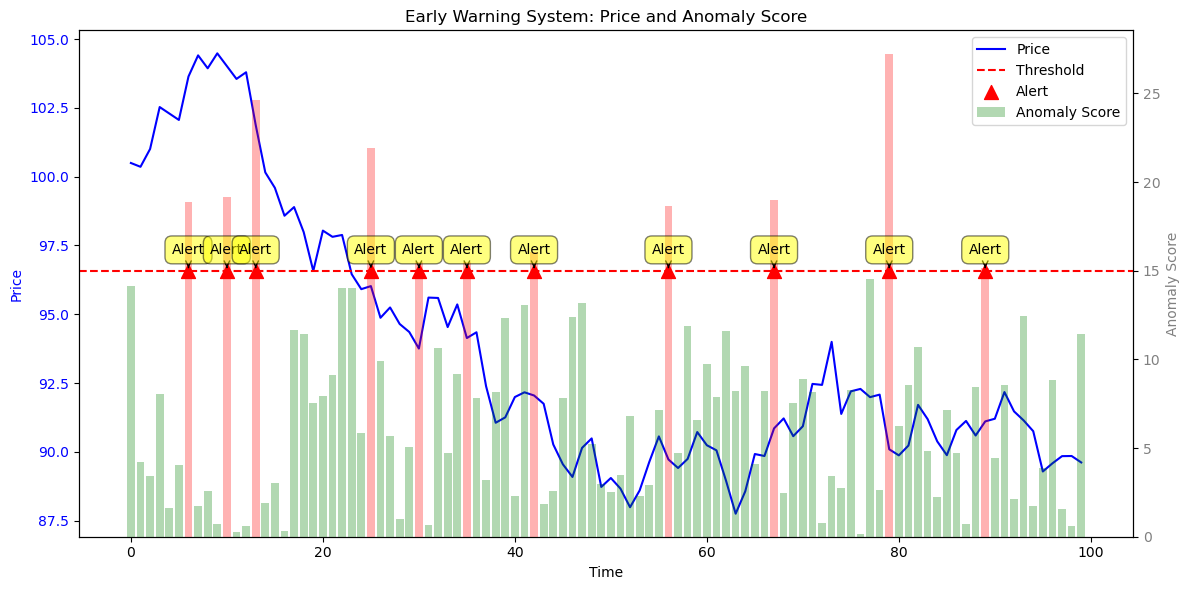

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
days = 100
time = np.arange(days)
price = 100 + np.cumsum(np.random.randn(days))
anomaly_score = np.abs(np.random.randn(days) * 10)
threshold = 15

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot price
ax1.plot(time, price, color='blue', label='Price')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for anomaly score
ax2 = ax1.twinx()
ax2.set_ylabel('Anomaly Score', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Plot anomaly score with color coding
colors = ['green' if score < threshold else 'red' for score in anomaly_score]
ax2.bar(time, anomaly_score, alpha=0.3, color=colors, label='Anomaly Score')

# Plot threshold line
ax2.axhline(y=threshold, color='red', linestyle='--', label='Threshold')

# Highlight points where anomaly score exceeds threshold
alerts = time[anomaly_score > threshold]
ax2.scatter(alerts, [threshold] * len(alerts), color='red', s=100, marker='^', label='Alert')

# Add annotations for alerts
for alert in alerts:
    ax2.annotate('Alert', (alert, threshold), xytext=(0, 10), 
                 textcoords='offset points', ha='center', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# Customize the plot
plt.title('Early Warning System: Price and Anomaly Score')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Show the plot
plt.tight_layout()
plt.show()

### Feature Anomalies

In [48]:
# Example usage
columns = ['Period', 'Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon', 'CCFI', 'CoalIndex', 'Coke', 'MEX_CPI', 
           'FRA_CPI', 'JPN_CPI', 'NaturalGasIndex', 'USA_CPI', 'US_Export_000_MT', 'GBR_CPI', 'BRA_CPI', 'CHN_CPI', 'InvescoTAN_Price', 'beijing_pm25', 'beijing_pm10', 'shanghai_pm10']

In [56]:
df_plot = detect_anomalies(df_sub, 'CHN_CPI')

plot_anomalies(df_sub, 'Period', 'CHN_CPI', 'anomaly', 'Anomaly Detection for CHN_CPI')


c:\Users\249881\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

c:\Users\249881\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [58]:
df['Target_SodaAshLightChinaSpotExportAverageFOBChinaUSperMetricTon'].to_clipboard()